In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as stats
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

# We do some financial analysis about some stocks, then we will see some risk-reward of cryptos

In [8]:
start = "2014-10-01"
end = "2022-10-13"
symbol = ["BA","MSFT","^DJI","BTC-USD","EURUSD=X","GC=F"]

In [9]:
df = yf.download(symbol,start,end) #I save in pandas df

[*********************100%***********************]  6 of 6 completed


In [10]:
df

Adj Close                                         \
                                 BA    BTC-USD EURUSD=X      GC=F     MSFT   
Date                                                                         
2014-09-30 23:00:00+00:00       NaN        NaN   1.2628       NaN      NaN   
2014-10-01 00:00:00+00:00       NaN   383.6150      NaN       NaN      NaN   
2014-10-01 04:00:00+00:00  108.4067        NaN      NaN 1214.6000  39.9219   
2014-10-01 23:00:00+00:00       NaN        NaN   1.2624       NaN      NaN   
2014-10-02 00:00:00+00:00       NaN   375.0720      NaN       NaN      NaN   
...                             ...        ...      ...       ...      ...   
2022-10-11 00:00:00+00:00       NaN 19051.4180      NaN       NaN      NaN   
2022-10-11 04:00:00+00:00  131.5700        NaN      NaN 1678.7000 225.4100   
2022-10-11 23:00:00+00:00       NaN        NaN   0.9700       NaN      NaN   
2022-10-12 00:00:00+00:00       NaN 19157.4453      NaN       NaN      NaN   
2022-10-12 04:00:00+00:00  130.4200        NaN      NaN 1670.3000 225.7500   

                                        Close                                \
                                ^DJI       BA    BTC-USD EURUSD=X      GC=F   
Date                                                                          
2014-09-30 23:00:00+00:00        NaN      NaN        NaN   1.2628       NaN   
2014-10-01 00:00:00+00:00        NaN      NaN   383.6150      NaN       NaN   
2014-10-01 04:00:00+00:00 16804.7109 124.6700        NaN      NaN 1214.6000   
2014-10-01 23:00:00+00:00        NaN      NaN        NaN   1.2624       NaN   
2014-10-02 00:00:00+00:00        NaN      NaN   375.0720      NaN       NaN   
...                              ...      ...        ...      ...       ...   
2022-10-11 00:00:00+00:00        NaN      NaN 19051.4180      NaN       NaN   
2022-10-11 04:00:00+00:00 29239.1895 131.5700        NaN      NaN 1678.7000   
2022-10-11 23:00:00+00:00        NaN      NaN        NaN   0.9700       NaN   
2022-10-12 00:00:00+00:00        NaN      NaN 19157.4453      NaN       NaN   
2022-10-12 04:00:00+00:00 29210.8496 130.4200        NaN      NaN 1670.3000   

                           ...     Open                                \
                           ... EURUSD=X      GC=F     MSFT       ^DJI   
Date                       ...                                          
2014-09-30 23:00:00+00:00  ...   1.2629       NaN      NaN        NaN   
2014-10-01 00:00:00+00:00  ...      NaN       NaN      NaN        NaN   
2014-10-01 04:00:00+00:00  ...      NaN 1207.7000  46.2700 17040.4609   
2014-10-01 23:00:00+00:00  ...   1.2625       NaN      NaN        NaN   
2014-10-02 00:00:00+00:00  ...      NaN       NaN      NaN        NaN   
...                        ...      ...       ...      ...        ...   
2022-10-11 00:00:00+00:00  ...      NaN       NaN      NaN        NaN   
2022-10-11 04:00:00+00:00  ...      NaN 1661.8000 227.6200 29085.1992   
2022-10-11 23:00:00+00:00  ...   0.9700       NaN      NaN        NaN   
2022-10-12 00:00:00+00:00  ...      NaN       NaN      NaN        NaN   
2022-10-12 04:00:00+00:00  ...      NaN 1668.0000 225.4000 29233.0605   

                                Volume                                     \
                                    BA          BTC-USD EURUSD=X     GC=F   
Date                                                                        
2014-09-30 23:00:00+00:00          NaN              NaN   0.0000      NaN   
2014-10-01 00:00:00+00:00          NaN    26229400.0000      NaN      NaN   
2014-10-01 04:00:00+00:00 5265200.0000              NaN      NaN 178.0000   
2014-10-01 23:00:00+00:00          NaN              NaN   0.0000      NaN   
2014-10-02 00:00:00+00:00          NaN    21777700.0000      NaN      NaN   
...                                ...              ...      ...      ...   
2022-10-11 00:00:00+00:00          NaN 28711532910.0000      NaN      NaN   
2022-10-11 04:00:00+00:00 8508400

In [11]:
close = df.Close.copy() #I am interested in the close price
close.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,2023.0000,2934.0000,2093.0000,2021.0000,2023.0000,2023.0000
mean,222.0760,12785.4602,1.1350,1447.1539,137.2404,24857.9870
std,88.4797,16397.1520,0.0550,272.3789,88.4591,5935.0433
min,95.0100,178.1030,0.9596,1050.8000,40.2900,15660.1797
25%,144.7700,665.1670,1.1014,1228.9000,57.9450,18480.6953
50%,194.2700,6843.3289,1.1297,1314.3000,106.7100,24964.7500
75%,320.3400,14643.7751,1.1762,1743.3000,213.1350,28923.3604
max,440.6200,67566.8281,1.2822,2051.5000,343.1100,36799.6484


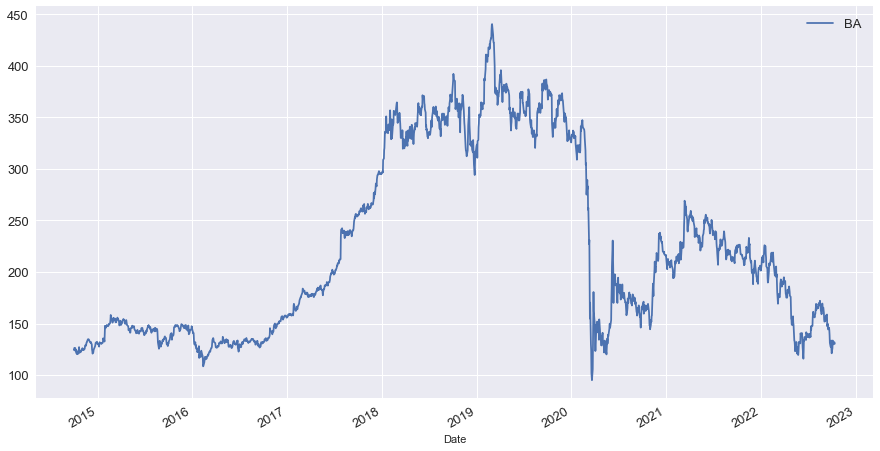

In [12]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()
#Let's plot the price of BA stock

In [13]:
norm = close.BA.div(close.BA.loc[close.BA.first_valid_index()]).mul(100)
norm
#Obviusly is meaningless to look at the absolute change, we need to see the relative fluctuation in stock 

Date
2014-09-30 23:00:00+00:00        NaN
2014-10-01 00:00:00+00:00        NaN
2014-10-01 04:00:00+00:00   100.0000
2014-10-01 23:00:00+00:00        NaN
2014-10-02 00:00:00+00:00        NaN
                              ...   
2022-10-11 00:00:00+00:00        NaN
2022-10-11 04:00:00+00:00   105.5346
2022-10-11 23:00:00+00:00        NaN
2022-10-12 00:00:00+00:00        NaN
2022-10-12 04:00:00+00:00   104.6122
Name: BA, Length: 6187, dtype: float64

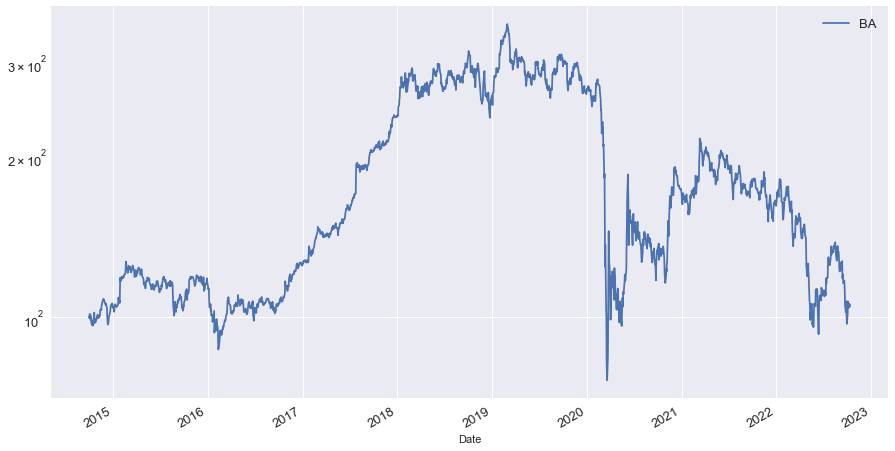

In [14]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()
#Let's look at the relative change, in log scale

# Let's look at the microsoft stock prices. Let's see the standard variation and the average of the relative change in the microsoft stock price

### the standard deviation is of course linked to the risk, while the average of the relative difference is linked to the global profit

In [15]:
msft = close.MSFT.dropna().to_frame().copy()
msft.rename(columns = {"MSFT":"Price"}, inplace = True)
msft["P_lag1"] = msft.shift(periods = 1)
msft["P_diff"] = msft.Price.sub(msft.P_lag1) # Alternative 1
msft["P_diff_rel"] = msft.Price.div(msft.P_lag1) - 1 # Alternative 1

msft.describe()

,Price,P_lag1,P_diff,P_diff_rel
count,2023.0000,2022.0000,2022.0000,2022.0000
mean,137.2404,137.1966,0.0889,0.0009
std,88.4591,88.4591,2.9687,0.0174
min,40.2900,40.2900,-23.4100,-0.1474
25%,57.9450,57.9425,-0.6700,-0.0068
50%,106.7100,106.5900,0.0600,0.0008
75%,213.1350,213.0200,0.9575,0.0096
max,343.1100,343.1100,19.7700,0.1422


### let's compare microsoft with bitcoin

In [16]:
btc = close.loc[:,"BTC-USD"].dropna().to_frame().copy()
btc.rename(columns = {"BTC-USD":"Price"}, inplace = True)
btc["P_lag1"] = btc.shift(periods = 1)
btc["P_diff"] = btc.Price.sub(btc.P_lag1) # Alternative 1
btc["P_diff_rel"] = btc.Price.div(btc.P_lag1) - 1 # Alternative 1

btc.describe()

,Price,P_lag1,P_diff,P_diff_rel
count,2934.0000,2933.0000,2933.0000,2933.0000
mean,12785.4602,12783.2876,6.4009,0.0021
std,16397.1520,16399.5257,803.2430,0.0385
min,178.1030,178.1030,-7554.0391,-0.3717
25%,665.1670,665.1230,-65.9750,-0.0137
50%,6843.3289,6842.4277,1.6270,0.0019
75%,14643.7751,14606.5000,94.0601,0.0180
max,67566.8281,67566.8281,7293.0234,0.2525


#### take home message. Btc have a higher reward but also higher risk (higher std but higher mean of P_diff_rel

#

# Let's compute the CAGR (Compound annual growth rate)

### The compound annual growth rate (CAGR) is the rate of return (RoR) that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each period of the investment’s life span.

In [17]:
multiple = (msft.Price[-1] / msft.Price[0]) #global change in the stock over the period
start = msft.index[0]
end = msft.index[-1]
td = end - start
td_years = td.days / 365.25 #period of interest, in ys
cagr = multiple**(1 / td_years) - 1 # this is how to compute the cagr 
cagr

0.2194178758872709

In [18]:
multiple = (btc.Price[-1] / btc.Price[0])
start = btc.index[0]
end = btc.index[-1]
td = end - start
td_years = td.days / 365.25
cagr = multiple**(1 / td_years) - 1
cagr

0.6274551087438303

#### take home message, btc has an higher Cagr than microsoft, as was predictable

### from the cagr, one can compute the final price over the period of interest

In [20]:
btc.Price[0]*(1 + cagr)**(td_years)

19157.445312499996

### One can compute the multiple over the period of interest by compunding the daily returns. Arithmetic average of the daily return is clearly wrong

In [24]:
multiple = (1 + msft.P_diff_rel).prod() # alternative #3 to calculate multiple (compounding daily returns)
n = msft.P_diff_rel.count()
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean
(1 + geo_mean)**n

4.918300490092928

In [25]:
multiple = (1 + btc.P_diff_rel).prod() # alternative #3 to calculate multiple (compounding daily returns)
n = btc.P_diff_rel.count()
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean
(1 + geo_mean)**n

49.93925107253379

## discrete and cagr

### Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

In [26]:
PV = 100
r = 0.08
n = 1
m = 12

In [27]:
FV = PV * (1 + r/m)**(n*m)
FV

108.29995068075098

In [28]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

0.08299950680750978

## Continuous Compounding 

### Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

In [ ]:
PV = 100
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

### Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [31]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

0.07973451262402206

## Simple Returns vs Log Returns ( Part 1)

#### __Take Home: Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

In [55]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

These two quantities are the same, however one is additive the other is multiplicative

In [57]:
com_ret = msft.P_diff_rel.add(1).prod() # compounding simple returns ("compound returns")
cum_ret = np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")
print(com_ret)
print(cum_ret)

4.918300490093001
4.918300490092992


### the cagr can be computed as the mean of the log returns

In [58]:
cagr = (msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1
cagr

0.2194178758872709

In [59]:
trading_days_year = msft.P_diff_rel.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.80207978179337

In [60]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1

0.21941787588727024

In [62]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1

0.21941787588727024

## Performance Comparison
### General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns.

In [69]:
np.log(close / close.shift()).info()
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info()
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6187 entries, 2014-09-30 23:00:00+00:00 to 2022-10-12 04:00:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        0 non-null      float64
 1   BTC-USD   641 non-null    float64
 2   EURUSD=X  34 non-null     float64
 3   GC=F      0 non-null      float64
 4   MSFT      0 non-null      float64
 5   ^DJI      0 non-null      float64
dtypes: float64(6)
memory usage: 467.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6187 entries, 2014-09-30 23:00:00+00:00 to 2022-10-12 04:00:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        2022 non-null   float64
 1   BTC-USD   2933 non-null   float64
 2   EURUSD=X  2092 non-null   float64
 3   GC=F      2020 non-null   float64
 4   MSFT      2022 non-null   float64
 5   ^DJI      2022 non-null   float64
dtypes: float64(6)
memory 

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,2022.000000,2933.000000,2092.000000,2020.000000,2022.000000,2022.000000
mean,0.000022,0.001333,-0.000126,0.000158,0.000788,0.000273
std,0.026434,0.038867,0.005109,0.009373,0.017376,0.011765
min,-0.272444,-0.464730,-0.028144,-0.051069,-0.159453,-0.138418
25%,-0.010193,-0.013782,-0.003073,-0.004349,-0.006797,-0.003866
50%,0.000207,0.001917,-0.000085,0.000297,0.000785,0.000554
75%,0.010588,0.017794,0.002812,0.005087,0.009536,0.005481
max,0.217677,0.225119,0.028145,0.057775,0.132929,0.107643


In [77]:
summary = returns.agg(["mean", "std"]).T
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.000022,0.026434
BTC-USD,0.001333,0.038867
EURUSD=X,-0.000126,0.005109
GC=F,0.000158,0.009373
MSFT,0.000788,0.017376
^DJI,0.000273,0.011765


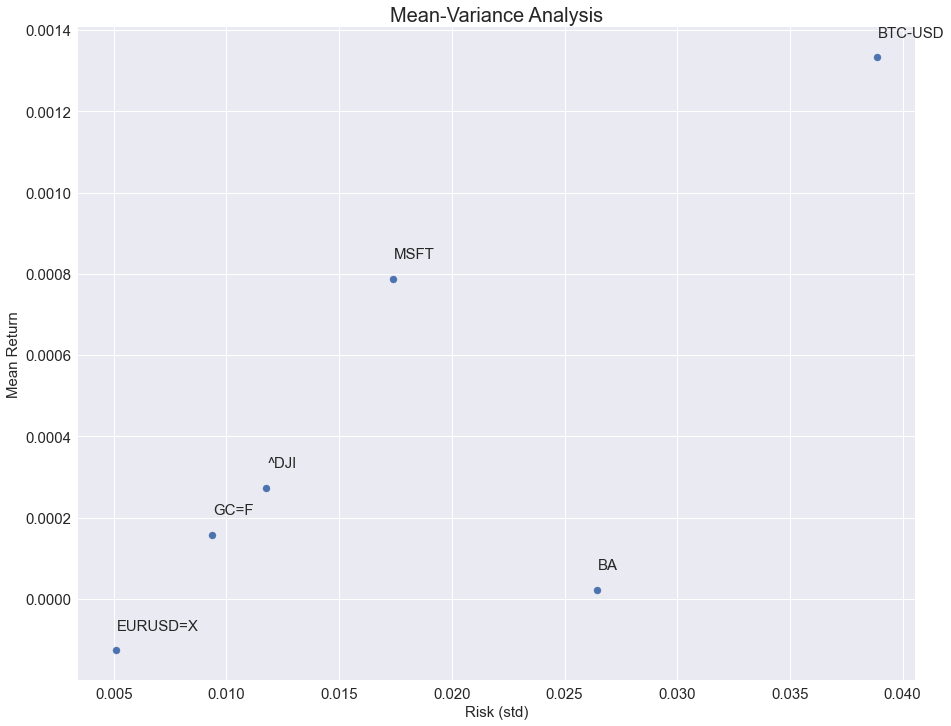

In [78]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

### Let's compare now the crypto

In [4]:
start = "2014-10-01"
end = "2022-10-13"
symbol = ["BTC-USD","ETH-USD","DOGE-USD","BNB-USD","ADA-USD","XRP-USD","SOL-USD","DOT-USD","LTC-USD"]
df = yf.download(symbol,start,end) #I save in pandas df

[*********************100%***********************]  9 of 9 completed


In [9]:
close = df.Close.copy()
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
summary = returns.agg(["mean", "std"]).T
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
ADA-USD,0.0014,0.0683
BNB-USD,0.0027,0.0594
BTC-USD,0.0013,0.0389
DOGE-USD,0.0021,0.0786
DOT-USD,0.0010,0.0687
ETH-USD,0.0008,0.0517
LTC-USD,0.0008,0.0561
SOL-USD,0.0038,0.0786
XRP-USD,0.0004,0.0644


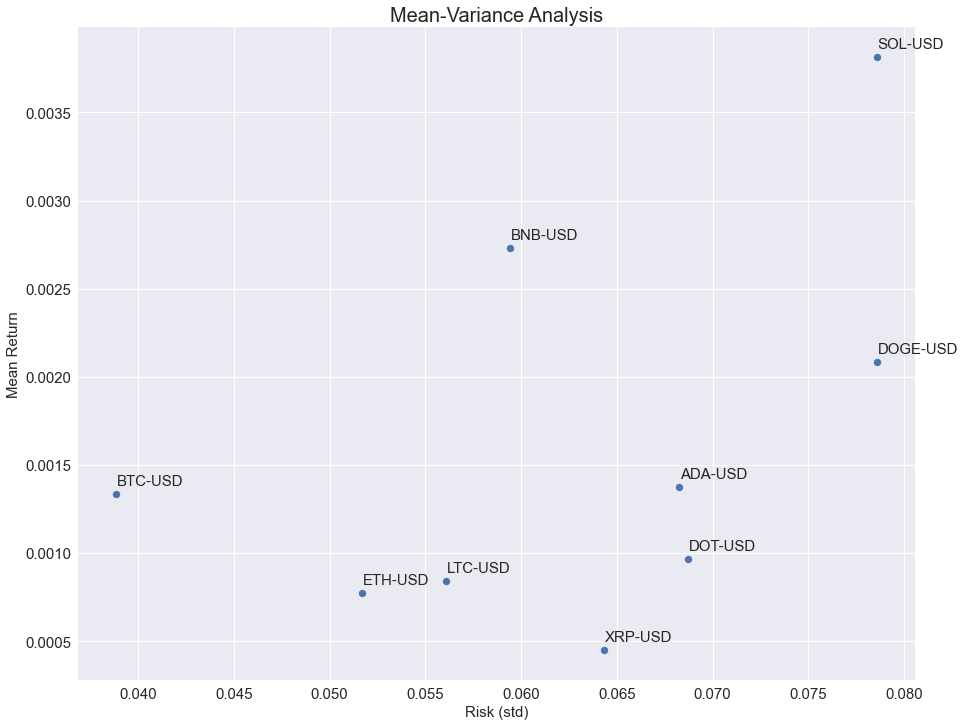

In [10]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

## Normality of Financial Returns 

### MSFT

In [11]:
symbol = ["BA","MSFT","^DJI","BTC-USD","EURUSD=X","GC=F"]
df = yf.download(symbol,start,end) #I save in pandas df
close = df.Close.copy() #I am interested in the close price
msft = close.MSFT.dropna().to_frame().copy()


[*********************100%***********************]  6 of 6 completed


In [13]:
msft = close.MSFT.dropna().to_frame().copy()
msft.rename(columns = {"MSFT":"Price"}, inplace = True)
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft.describe()

,Price,log_ret
count,2023.0000,2022.0000
mean,137.2404,0.0008
std,88.4591,0.0174
min,40.2900,-0.1595
25%,57.9450,-0.0068
50%,106.7100,0.0008
75%,213.1350,0.0095
max,343.1100,0.1329


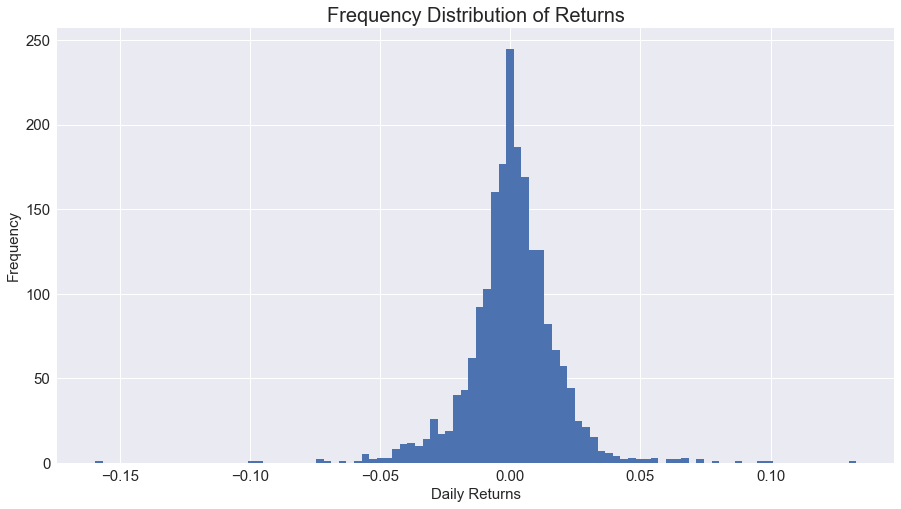

In [14]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

In [15]:
mu = msft.log_ret.mean()
mu


0.0007878155499441363

In [16]:
sigma = msft.log_ret.std()
sigma

0.017376458554141116

In [18]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

-0.20712190090845106

In [19]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

8.796468740244038

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


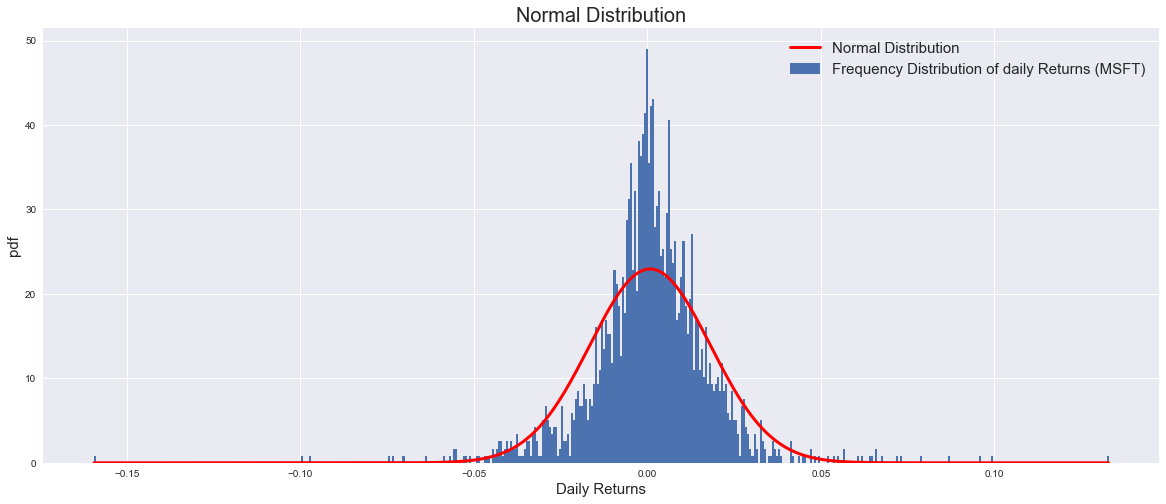

In [20]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### BTC

In [29]:
btc = close.loc[:,"BTC-USD"].dropna().to_frame().copy()
btc.rename(columns = {"BTC-USD":"Price"}, inplace = True)
btc["log_ret"] = np.log(btc.Price / btc.Price.shift()) 
btc.describe()

,Price,log_ret
count,2934.0000,2933.0000
mean,12785.4602,0.0013
std,16397.1520,0.0389
min,178.1030,-0.4647
25%,665.1670,-0.0138
50%,6843.3289,0.0019
75%,14643.7751,0.0178
max,67566.8281,0.2251


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


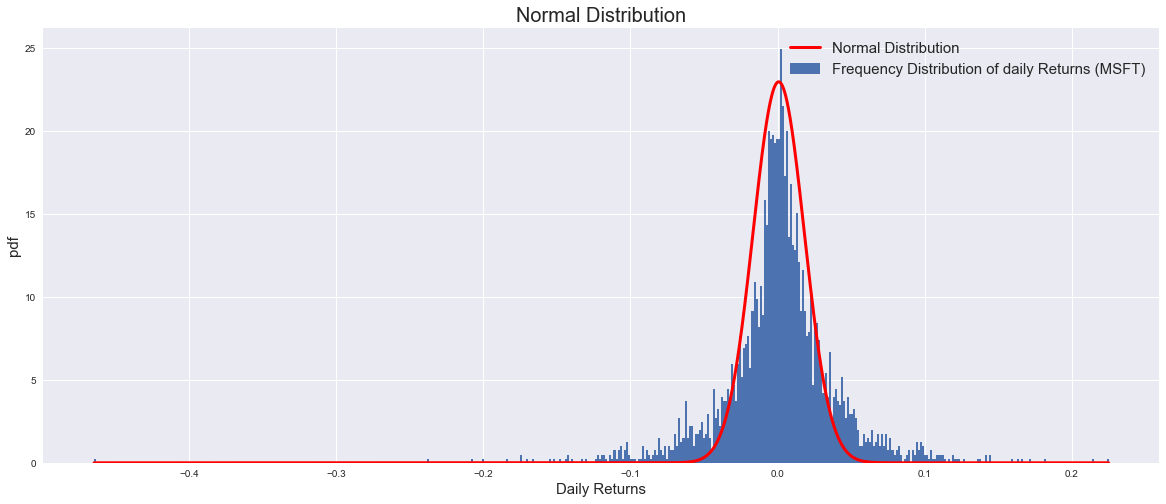

In [30]:
x = np.linspace(btc.log_ret.min(), btc.log_ret.max(), 10000)
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
plt.figure(figsize = (20, 8))
plt.hist(btc.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [31]:
stats.skew(btc.log_ret.dropna())

-0.7726821679608767

## Annualizing Mean Return and Std of Returns

In [32]:
msft = close.MSFT.dropna().to_frame().copy()
msft.rename(columns = {"MSFT":"Price"}, inplace = True)
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft.describe()

,Price,log_ret
count,2023.0000,2022.0000
mean,137.2404,0.0008
std,88.4591,0.0174
min,40.2900,-0.1595
25%,57.9450,-0.0068
50%,106.7100,0.0008
75%,213.1350,0.0095
max,343.1100,0.1329


In [33]:
msft.log_ret.agg(["mean", "std"])

mean   0.0008
std    0.0174
Name: log_ret, dtype: float64

In [34]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

0.19852951858592235

In [35]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

0.2196080279872712

In [36]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

0.2758427280076703

In [37]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

0.2758427280076703

In [38]:
monthly = msft.Price.resample("M").last() ## resample to monthly (month end)
monthly

Date
2014-10-31 00:00:00+00:00    46.9500
2014-11-30 00:00:00+00:00    47.8100
2014-12-31 00:00:00+00:00    46.4500
2015-01-31 00:00:00+00:00    40.4000
2015-02-28 00:00:00+00:00    43.8500
                              ...   
2022-06-30 00:00:00+00:00   256.8300
2022-07-31 00:00:00+00:00   280.7400
2022-08-31 00:00:00+00:00   261.4700
2022-09-30 00:00:00+00:00   232.9000
2022-10-31 00:00:00+00:00   225.7500
Freq: M, Name: Price, Length: 97, dtype: float64

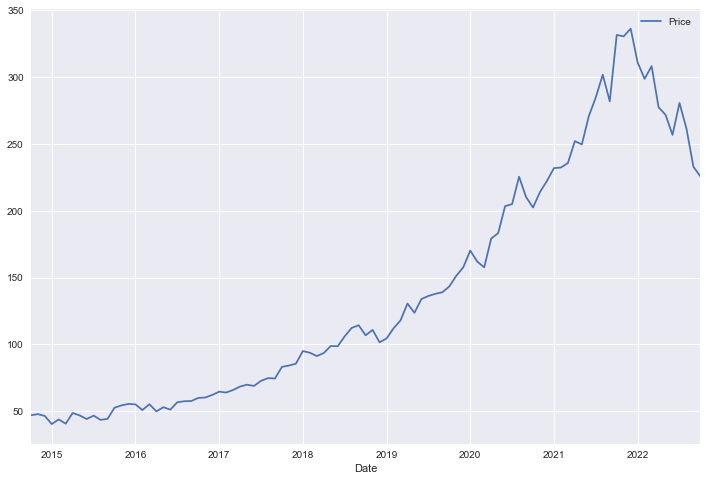

In [39]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [40]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [41]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [42]:
ann_mean

[0.19763146382653576,
 0.1976314638265357,
 0.19629312129909765,
 0.19718203693844713,
 0.219886454539422]

In [43]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.2687,0.1976
Q,0.2069,0.1976
M,0.2183,0.1963
W-Fri,0.2379,0.1972
D,0.2718,0.2199


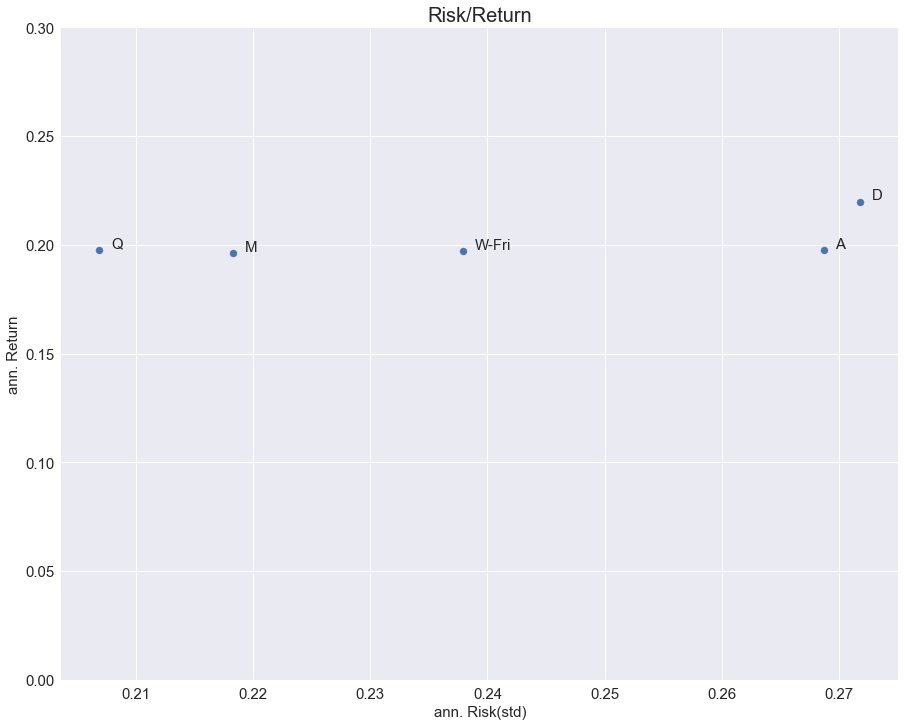

In [44]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Rolling Statistics

In [ ]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

In [ ]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

__Are Return and Risk constant over time? No, of course not! They change over time.__
__Let´s measure/quantify this with rolling statistics!__

In [45]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [46]:
msft.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [47]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-10-01 04:00:00+00:00       NaN
2014-10-02 04:00:00+00:00       NaN
2014-10-03 04:00:00+00:00       NaN
2014-10-06 04:00:00+00:00       NaN
2014-10-07 04:00:00+00:00       NaN
                              ...  
2022-10-06 04:00:00+00:00   -0.1720
2022-10-07 04:00:00+00:00   -0.2301
2022-10-10 04:00:00+00:00   -0.2517
2022-10-11 04:00:00+00:00   -0.2664
2022-10-12 04:00:00+00:00   -0.2603
Name: log_ret, Length: 2023, dtype: float64

In [48]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

Date
2014-10-01 04:00:00+00:00       NaN
2014-10-02 04:00:00+00:00       NaN
2014-10-03 04:00:00+00:00       NaN
2014-10-06 04:00:00+00:00       NaN
2014-10-07 04:00:00+00:00       NaN
                              ...  
2022-10-06 04:00:00+00:00   -0.1720
2022-10-07 04:00:00+00:00   -0.2301
2022-10-10 04:00:00+00:00   -0.2517
2022-10-11 04:00:00+00:00   -0.2664
2022-10-12 04:00:00+00:00   -0.2603
Name: log_ret, Length: 2023, dtype: float64

In [49]:
roll_mean.iloc[250:]

Date
2015-09-29 04:00:00+00:00       NaN
2015-09-30 04:00:00+00:00       NaN
2015-10-01 04:00:00+00:00   -0.0285
2015-10-02 04:00:00+00:00   -0.0042
2015-10-05 04:00:00+00:00    0.0116
                              ...  
2022-10-06 04:00:00+00:00   -0.1720
2022-10-07 04:00:00+00:00   -0.2301
2022-10-10 04:00:00+00:00   -0.2517
2022-10-11 04:00:00+00:00   -0.2664
2022-10-12 04:00:00+00:00   -0.2603
Name: log_ret, Length: 1773, dtype: float64

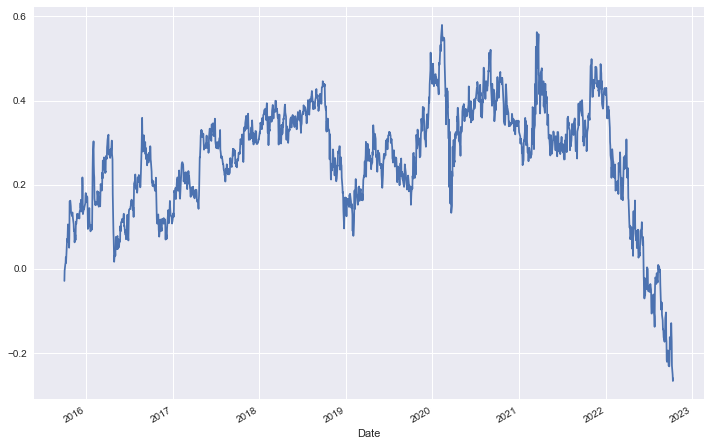

In [50]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [51]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01 04:00:00+00:00      NaN
2014-10-02 04:00:00+00:00      NaN
2014-10-03 04:00:00+00:00      NaN
2014-10-06 04:00:00+00:00      NaN
2014-10-07 04:00:00+00:00      NaN
                             ...  
2022-10-06 04:00:00+00:00   0.3128
2022-10-07 04:00:00+00:00   0.3169
2022-10-10 04:00:00+00:00   0.3176
2022-10-11 04:00:00+00:00   0.3180
2022-10-12 04:00:00+00:00   0.3180
Name: log_ret, Length: 2023, dtype: float64

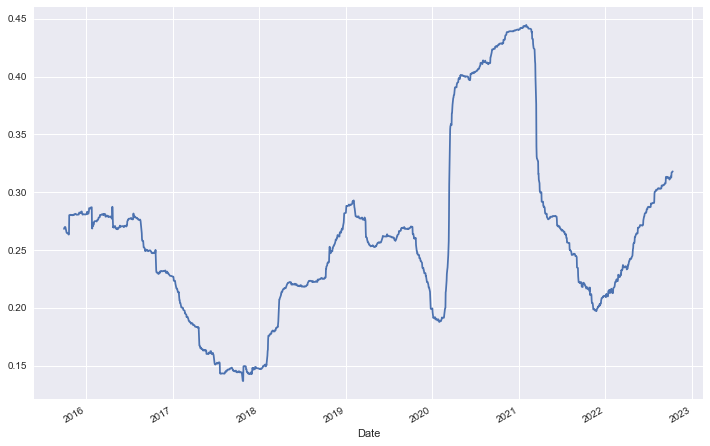

In [52]:
roll_std.plot(figsize = (12, 8))
plt.show()

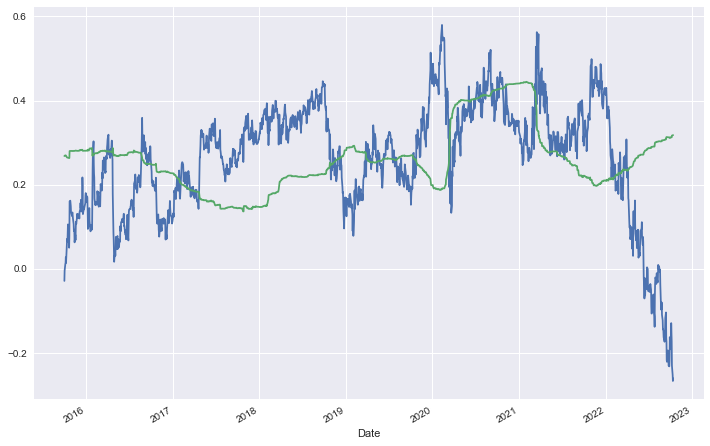

In [53]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

__Take Home__: Be careful, you´ll always find (sub-)periods with __low returns & high risk__ and __high returns & low risk__. 

__Another Example: Simple Moving Average (Prices) - SMA__

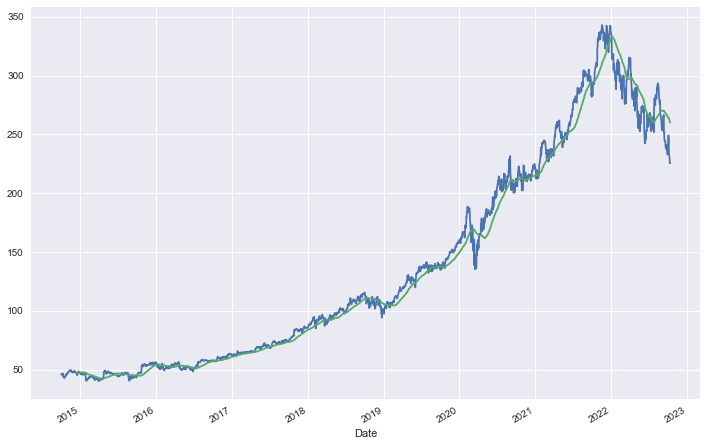

In [55]:
sma_window = 50
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

In [24]:
start = "2014-10-01"
end = "2022-10-13"
symbol = ["BTC-USD","ETH-USD","DOGE-USD","BNB-USD","ADA-USD","XRP-USD","SOL-USD","DOT-USD","LTC-USD"]
df = yf.download(symbol,start,end) #I save in pandas df
close = df.Close.copy() #I am interested in the close price
close["1_overbtc"] = 1/close.loc[:,"BTC-USD"]

[*********************100%***********************]  9 of 9 completed


In [25]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))


In [26]:
returns.corr()

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,DOT-USD,ETH-USD,LTC-USD,SOL-USD,XRP-USD,1_overbtc
ADA-USD,1.0000,0.5447,0.6128,0.4453,0.6582,0.6751,0.6429,0.4861,0.6333,-0.6128
BNB-USD,0.5447,1.0000,0.6655,0.3868,0.6144,0.6630,0.6433,0.5141,0.5087,-0.6655
BTC-USD,0.6128,0.6655,1.0000,0.4877,0.6561,0.7860,0.6819,0.4486,0.5535,-1.0000
DOGE-USD,0.4453,0.3868,0.4877,1.0000,0.3598,0.4631,0.4913,0.2537,0.4029,-0.4877
DOT-USD,0.6582,0.6144,0.6561,0.3598,1.0000,0.7214,0.6960,0.5461,0.5267,-0.6561
ETH-USD,0.6751,0.6630,0.7860,0.4631,0.7214,1.0000,0.8220,0.5709,0.6443,-0.7860
LTC-USD,0.6429,0.6433,0.6819,0.4913,0.6960,0.8220,1.0000,0.4922,0.6343,-0.6819
SOL-USD,0.4861,0.5141,0.4486,0.2537,0.5461,0.5709,0.4922,1.0000,0.4309,-0.4486
XRP-USD,0.6333,0.5087,0.5535,0.4029,0.5267,0.6443,0.6343,0.4309,1.0000,-0.5535
1_overbtc,-0.6128,-0.6655,-1.0000,-0.4877,-0.6561,-0.7860,-0.6819,-0.4486,-0.5535,1.0000


Three cases:
1
- no correlation: __correlation coefficient == 0__
2
- moving together: __0 < correlation coefficient <= 1__ (positive)
3
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)


## All the cryptos analyzed here are somewhat correlated

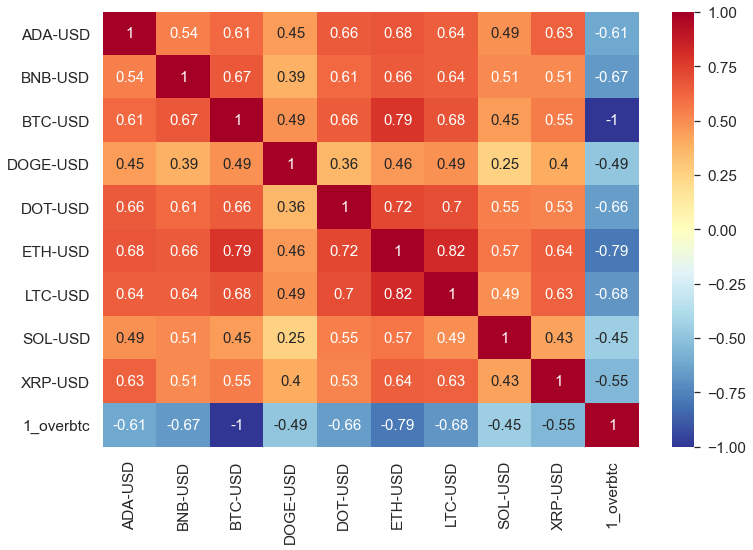

In [27]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()